<a href="https://colab.research.google.com/github/plumwiserim/Data-Analysis/blob/main/Class9_ML_%E1%84%80%E1%85%AE%E1%86%AB%E1%84%8C%E1%85%B5%E1%86%B8%E1%84%87%E1%85%AE%E1%86%AB%E1%84%89%E1%85%A5%E1%86%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 파이썬 머신러닝 실습
## 계층적군집분석

In [ ]:
# 모델 구현을 위한 라이브러리 로딩
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [ ]:
# load_iris() 메서드를 이용하여 iris 데이터 셋 로드
iris = load_iris()

# Feature 데이터 생성
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Label 데이터 생성
labels = pd.DataFrame(iris.target)
labels.columns=['labels']

df = pd.concat([df, labels], axis=1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram

result = linkage(df, method='complete')

In [ ]:
result

array([[1.01000000e+02, 1.42000000e+02, 0.00000000e+00, 2.00000000e+00],
       [7.00000000e+00, 3.90000000e+01, 1.00000000e-01, 2.00000000e+00],
       [0.00000000e+00, 1.70000000e+01, 1.00000000e-01, 2.00000000e+00],
       [9.00000000e+00, 3.40000000e+01, 1.00000000e-01, 2.00000000e+00],
       [1.28000000e+02, 1.32000000e+02, 1.00000000e-01, 2.00000000e+00],
       [1.00000000e+01, 4.80000000e+01, 1.00000000e-01, 2.00000000e+00],
       [4.00000000e+00, 3.70000000e+01, 1.41421356e-01, 2.00000000e+00],
       [1.90000000e+01, 2.10000000e+01, 1.41421356e-01, 2.00000000e+00],
       [2.90000000e+01, 3.00000000e+01, 1.41421356e-01, 2.00000000e+00],
       [5.70000000e+01, 9.30000000e+01, 1.41421356e-01, 2.00000000e+00],
       [8.00000000e+01, 8.10000000e+01, 1.41421356e-01, 2.00000000e+00],
       [1.16000000e+02, 1.37000000e+02, 1.41421356e-01, 2.00000000e+00],
       [8.00000000e+00, 3.80000000e+01, 1.41421356e-01, 2.00000000e+00],
       [3.00000000e+00, 4.70000000e+01, 1.41421356e

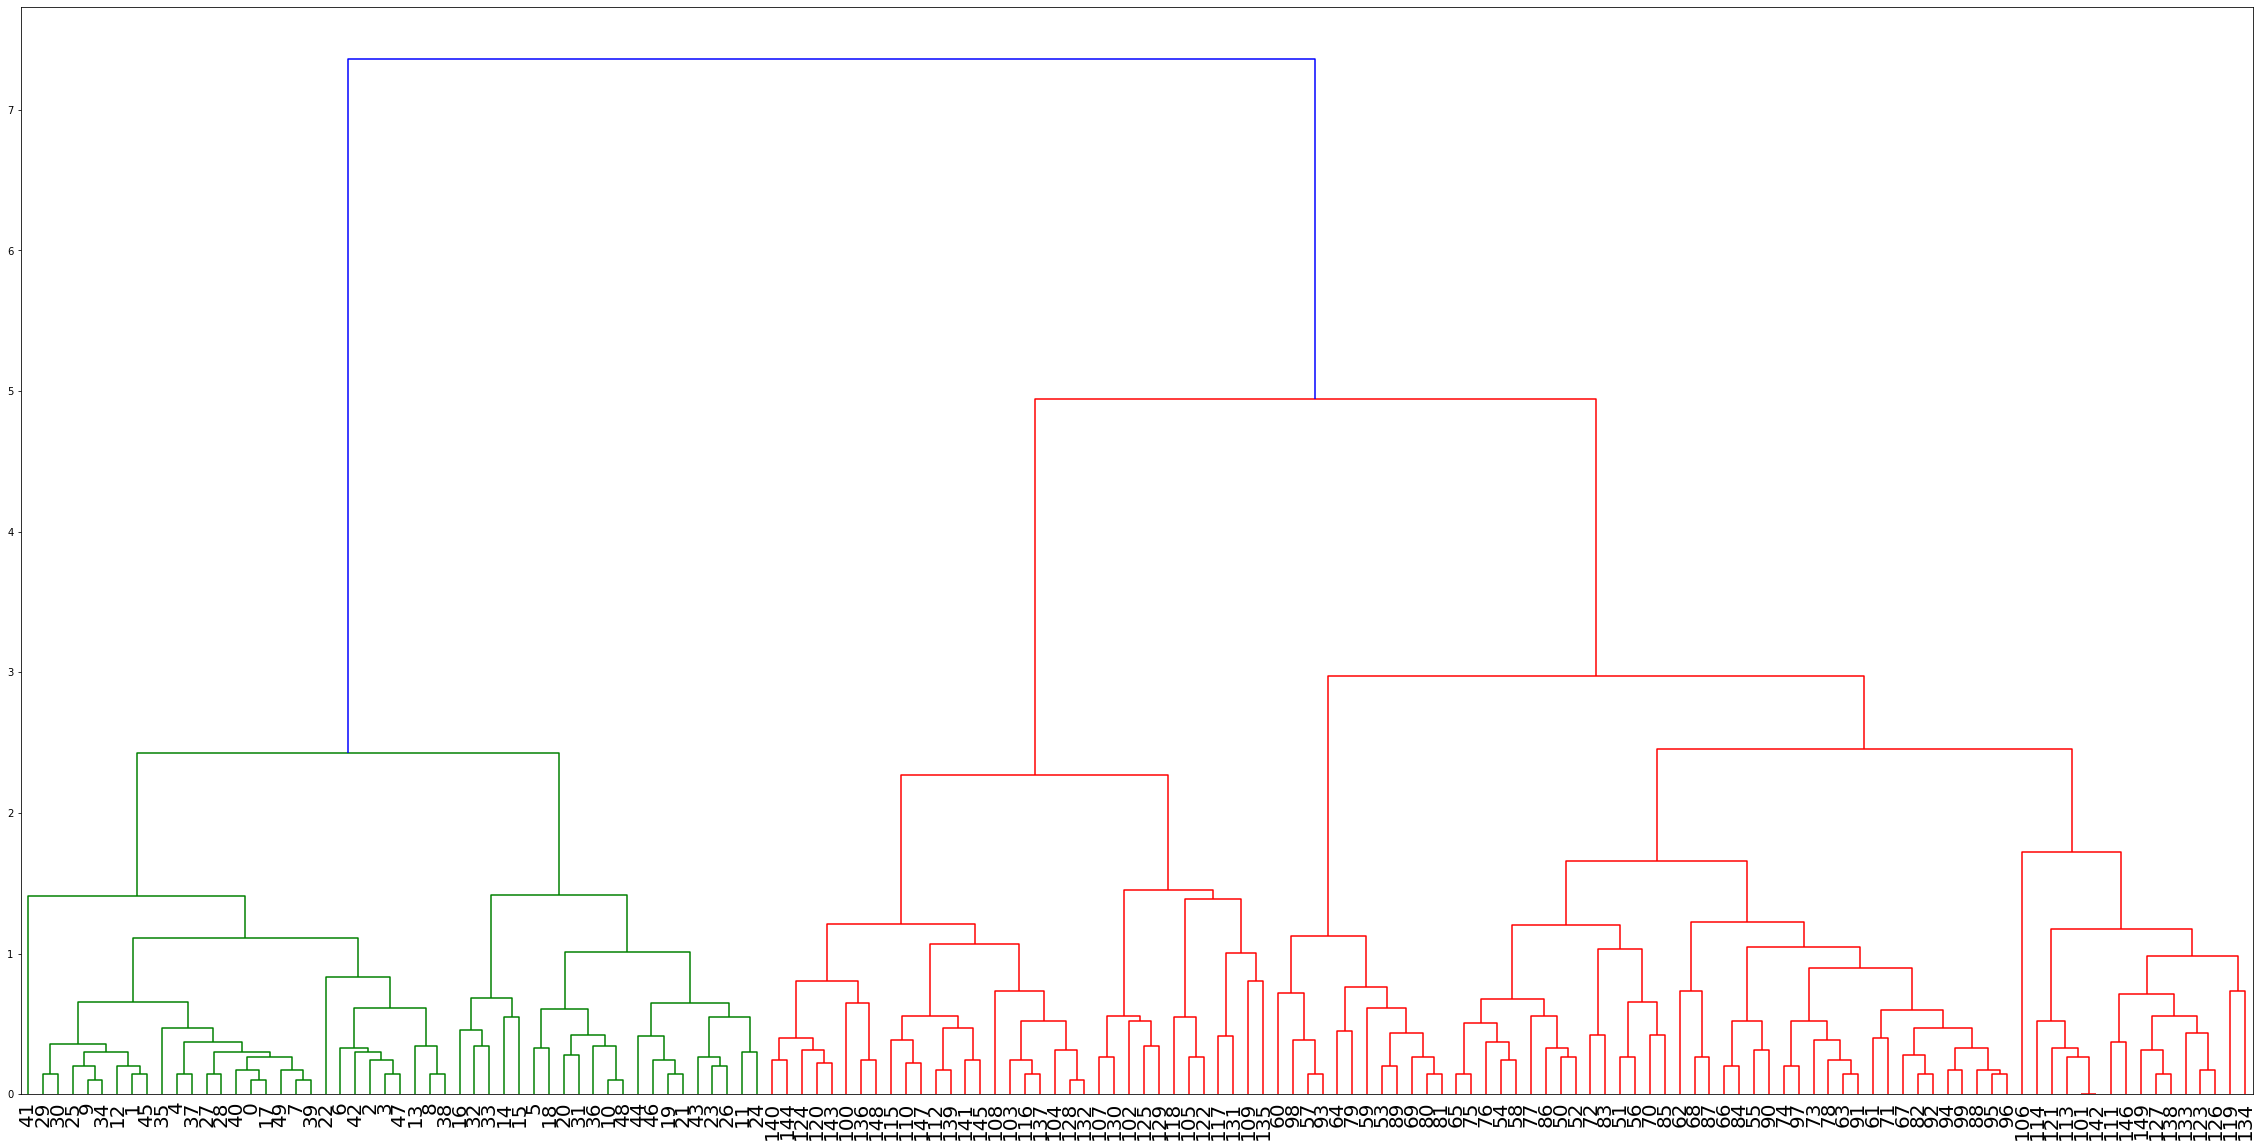

In [ ]:
plt.figure(figsize=(40,20))
dendrogram(result,
           leaf_rotation=90,
           leaf_font_size=20)
plt.show()

In [ ]:
# leaf_rotation=90 : 글자 각도
# leaf_font_size=20 : 글자 사이즈

 ### 군집 결과

In [ ]:
from scipy.cluster.hierarchy import fcluster

cuttree = fcluster(result, t=3, criterion='distance')
print(cuttree)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 2 2 2 2 3 2 2 2 2
 3 2 3 3 2 2 2 2 3 2 3 2 3 2 2 3 3 2 2 2 2 2 3 3 2 2 2 3 2 2 2 3 2 2 2 3 2
 2 3]


In [ ]:
predict = pd.DataFrame(cuttree)
predict.columns=['predict']
predict.head()

,predict
0,1
1,1
2,1
3,1
4,1


In [ ]:
ct = pd.crosstab(predict['predict'], labels['labels'])
ct

labels,0,1,2
predict,,,
1,50,0,0
2,0,0,34
3,0,50,16


In [ ]:
df['cluster'] = cuttree
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),labels,cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


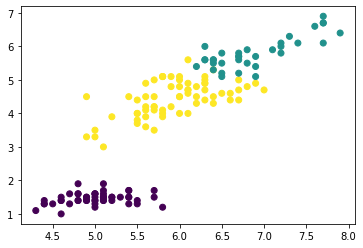

In [ ]:
plt.scatter(x=df.iloc[:,0], y=df.iloc[:,2], c=df['cluster'])

## 비계층적군집분석 : K-Means

In [ ]:
# 모델 구현을 위한 라이브러리 로딩
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

In [ ]:
# load_iris() 메서드를 이용하여 iris 데이터 셋 로드
iris = load_iris()

# Feature 데이터 생성
columns=['sepal_length', 'sepal_width', 'petal length', 'petal width']
df = pd.DataFrame(iris.data, columns=columns)

# Label 데이터 생성
labels = pd.DataFrame(iris.target)
labels.columns=['labels']

df = pd.concat([df, labels], axis=1)
df.head()

,sepal_length,sepal_width,petal length,petal width,labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Text(0.5, 1.0, 'Iris Dataset')

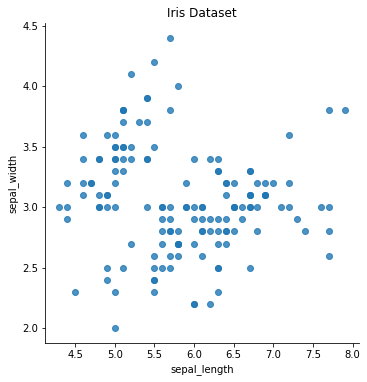

In [ ]:
sns.lmplot(x='sepal_length', 
           y='sepal_width',
           fit_reg=False,
           data=df)
plt.title('Iris Dataset')

In [ ]:
X_data = df.iloc[:, :4].values


In [ ]:
# 군집의 수 결정
k = 3

# 모델 객체 생성
kmeans = KMeans(n_clusters = k)

# 모델 학습
kmeans.fit(X_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
# 클러스트의 중심 좌표 값 출력
print(kmeans.cluster_centers_)

[[5.006      3.428      1.462      0.246     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]
 [6.85       3.07368421 5.74210526 2.07105263]]


In [ ]:
# 군집분석의 결과 라벨 값 출력
print(kmeans.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


In [ ]:
# 클러스터링 결과를 df 에 추가
df['cluster'] = kmeans.labels_

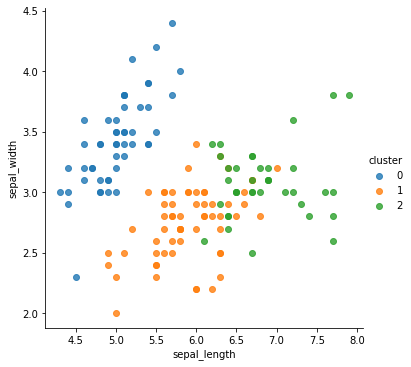

In [ ]:
# 시각화
sns.lmplot(x='sepal_length', 
           y='sepal_width',
           fit_reg=False,
           data=df,
          hue='cluster')
plt.show()

In [ ]:
import numpy as np

test_data = np.array([[5, 2, 6, 3]])
                     
kmeans.predict(test_data)

array([2], dtype=int32)

### K 값을 어떻게 찾을 것인가?

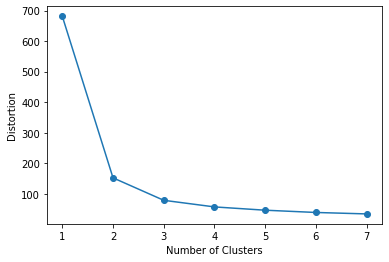

In [ ]:
'''
K-means에서 K는 오직 실험으로 획득됩니다.
Inertia value(응집도(거리의합))를 이용한 적정 군집수 판단
 - 거리의 합이므로, 값이 작을수록 응집도가 좋게됩니다. 즉, 좋은 K 를 고르는 방법이 됩니다.

K Means를 수행하기전에는 클러스터의 개수를 명시적으로 지정해줘야 합니다.
데이타를 2개로 클러스터링 할 것인지, 
3개로 할것인지 등을 정해야 하는데, 
몇개의 클러스터의 수가 가장 적절할지는 어떻게 결정할 수 있을까? 

그 해답은 Inertia value 라는 값을 보면 적정 클러스터 수를 선택할 수 있는 힌트를 얻을 수 있습니다.
Inertia value는 군집화가된 후에, 각 중심점에서 군집의 데이타간의 거리를 합산한것으로 군집의 응집도를 나타내는 값입니다.


아래 결과를 보시면, 
K = 2로 결정하면 좋겠다는게 눈에 보이네요
'''

k = range(1,8)
dist = []

for i in k:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(X_data)
  dist.append(kmeans.inertia_)

plt.plot(k, dist, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.show()